In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
def pca(data, num_components=2):
    """
    Perform PCA on the given dataset.

    Parameters:
    - data: 2D numpy array or pandas DataFrame where rows are samples and columns are features.
    - num_components: Number of principal components to return.

    Returns:
    - transformed_data: The data projected onto the selected principal components.
    - explained_variance_ratio: The percentage of variance explained by each of the selected principal components.
    """
    # Standardize the data (mean = 0, variance = 1)
    data_meaned = data - np.mean(data, axis=0)

    # Compute the covariance matrix
    covariance_matrix = np.cov(data_meaned, rowvar=False)

    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Scaling eigenvalues

    eigenvalues = eigenvalues / np.sum(eigenvalues)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues_sorted = eigenvalues[sorted_indices]
    eigenvectors_sorted = eigenvectors[:, sorted_indices]

    # Select the top 'num_components' eigenvectors
    eigenvectors_selected = eigenvectors_sorted[:, :num_components]

    # Project the data onto the selected eigenvectors
    transformed_data = np.dot(data_meaned, eigenvectors_selected)

    # Explained variance ratio
    explained_variance_ratio = eigenvalues_sorted[:num_components] / np.sum(eigenvalues_sorted)

    return transformed_data, explained_variance_ratio

In [7]:
# Load the data
df = pd.read_csv("cleaned_mlb_2022_full.csv")

# Filter for hitters with at least 100 PA
df_filtered = df[df['PA'] >= 100].copy()

# Selected features from swing profile + Statcast power metrics
features = ['Swing%', 'O-Swing%', 'Zone%', 'Contact%', 'EV', 'LA', 'Barrel%', 'HardHit%']

# Drop missing values and scale
df_features = df_filtered[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

In [9]:
# Apply PCA
X_pca, explained_var = pca(X_scaled, num_components=2)

# Add to DataFrame for plotting
df_features['PCA1'] = X_pca[:, 0]
df_features['PCA2'] = X_pca[:, 1]


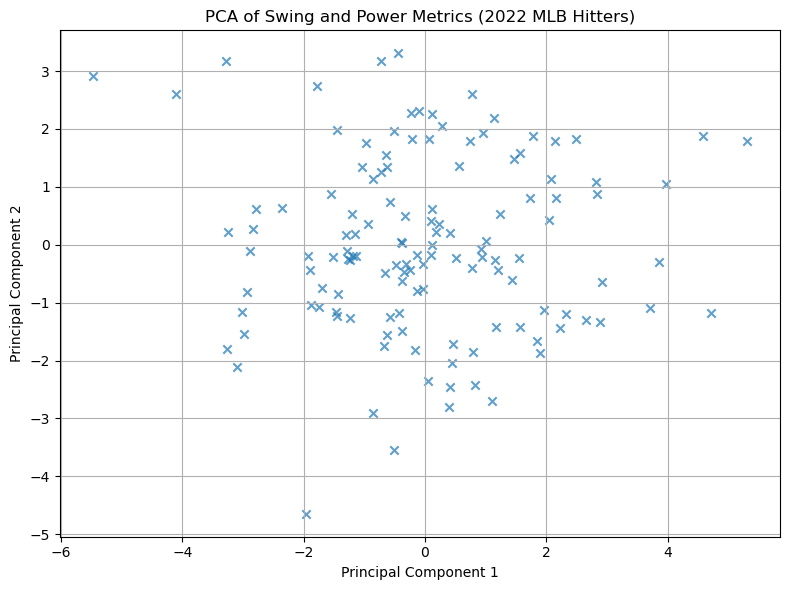

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df_features['PCA1'], df_features['PCA2'], alpha=0.7, marker='x')
plt.title("PCA of Swing and Power Metrics (2022 MLB Hitters)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


This plot projects each hitter into a two-dimensional space defined by the first two principal components derived from swing and power metrics. The scatter reveals a dense central cluster with most hitters grouped around the origin, suggesting a concentration of similar swing-power profiles. A few points lie further from the center, indicating players with more distinct offensive traits. The lack of strong separability suggests that while PCA has reduced dimensionality effectively, additional components or segmentation strategies might be needed for clearer grouping.

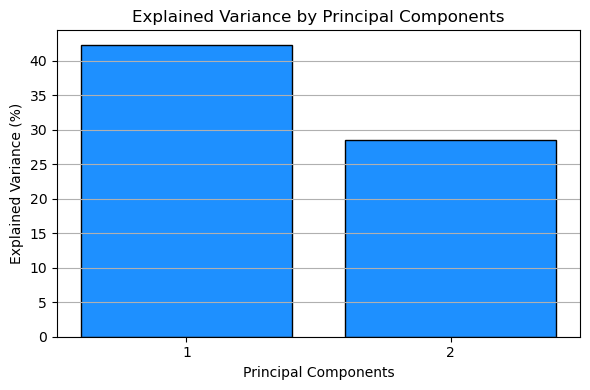

In [13]:
plt.figure(figsize=(6, 4))
plt.bar([1, 2], explained_var * 100, color='dodgerblue', edgecolor='black')
plt.ylabel("Explained Variance (%)")
plt.xlabel("Principal Components")
plt.title("Explained Variance by Principal Components")
plt.xticks([1, 2])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The bar plot shows that the first two principal components explain just over 70% of the total variance in the dataset—around 42% from the first component and 28% from the second. This indicates that PCA has captured a meaningful portion of the dataset’s variability in two dimensions, though roughly 30% of the variance is still unaccounted for in this projection. This retained variance supports PCA's use as an effective tool for initial visualization and compression, but also points to some loss of nuance compared to the original multi-dimensional space.

The PCA analysis successfully compresses high-dimensional swing and power metrics into two components that retain over 70% of the original variance, making it a useful tool for exploratory visualization. The resulting scatter plot reveals a largely homogeneous population of hitters with a few outliers, suggesting only modest underlying structure in this reduced space. While the technique captures dominant trends, the absence of well-separated clusters signals that PCA alone may not suffice for classification or segmentation tasks without further augmentation. This analysis lays a solid foundation for combining PCA with clustering algorithms to uncover more meaningful player groupings.